In [47]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Read the CSV files
rb85_data = pd.read_csv('OPT Data - Rubidium 85.csv')
rb87_data = pd.read_csv('OPT Data - Rubidium 87.csv')

r$Chi_{^85Rb, +}^2$ =438108.17277488136
$Chi_{^85Rb, -}^2$ =2379.5614184531787
$Chi_{^87Rb, +}^2$ =208871.4637793928
$Chi_{^87Rb, -}^2$ =5492.647896531442


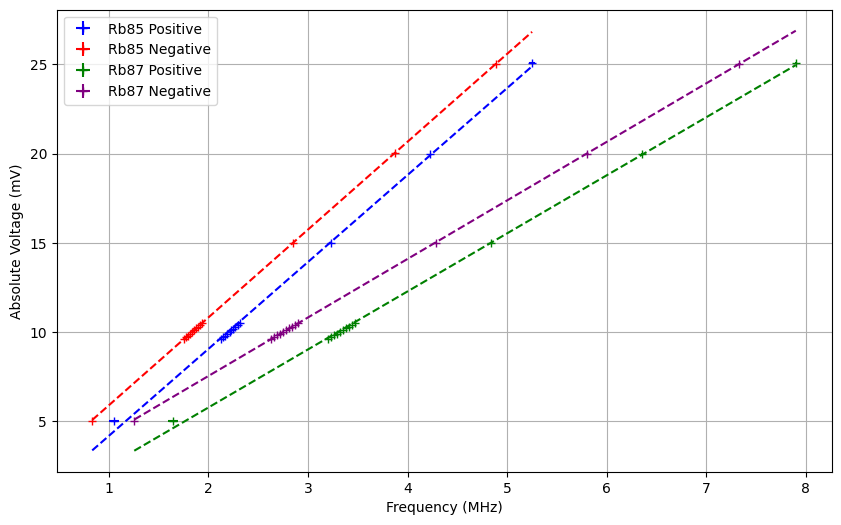

In [48]:
# Define a linear fitting function
def linear_fit(x, m, c):
    return m * x + c

# Define a function to calculate chi-squared
def chi_squared(observed, expected, errors):
    return np.sum(((observed - expected) / errors)**2)

# Separate data by isotope and polarity
rb85_positive = rb85_data[rb85_data['Polarity'] == 'P']
rb85_negative = rb85_data[rb85_data['Polarity'] == 'N']
rb87_positive = rb87_data[rb87_data['Polarity'] == 'P']
rb87_negative = rb87_data[rb87_data['Polarity'] == 'N']

# Define frequency values for fitting
rb85_values = np.linspace(min(rb85_data['Freq (MHz)']), max(rb85_data['Freq (MHz)']), 100)
rb87_values = np.linspace(min(rb87_data['Freq (MHz)']), max(rb87_data['Freq (MHz)']), 100)

# Fit lines
rb85_positive_params, _ = curve_fit(linear_fit, rb85_positive['Freq (MHz)'], rb85_positive['Abs Voltage'])
rb85_negative_params, _ = curve_fit(linear_fit, rb85_negative['Freq (MHz)'], rb85_negative['Abs Voltage'])
rb87_positive_params, _ = curve_fit(linear_fit, rb87_positive['Freq (MHz)'], rb87_positive['Abs Voltage'])
rb87_negative_params, _ = curve_fit(linear_fit, rb87_negative['Freq (MHz)'], rb87_negative['Abs Voltage'])

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Abs Voltage'], linear_fit(rb85_positive['Freq (MHz)'], *rb85_positive_params), rb85_positive['Voltage Error'])
chi_rb85_negative = chi_squared(rb85_negative['Abs Voltage'], linear_fit(rb85_negative['Freq (MHz)'], *rb85_negative_params), rb85_negative['Voltage Error'])
chi_rb87_positive = chi_squared(rb87_positive['Abs Voltage'], linear_fit(rb87_positive['Freq (MHz)'], *rb87_positive_params), rb87_positive['Voltage Error'])
chi_rb87_negative = chi_squared(rb87_negative['Abs Voltage'], linear_fit(rb87_negative['Freq (MHz)'], *rb87_negative_params), rb87_negative['Voltage Error'])

print(r"r$Chi_{^85Rb, +}^2$ ="+str(chi_rb85_positive))
print(r"$Chi_{^85Rb, -}^2$ ="+str(chi_rb85_negative))
print(r"$Chi_{^87Rb, +}^2$ ="+str(chi_rb87_positive))
print(r"$Chi_{^87Rb, -}^2$ ="+str(chi_rb87_negative))

# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Freq (MHz)'], rb85_positive['Abs Voltage'], 
             xerr=rb85_positive['Freq Err'], yerr=rb85_positive['Voltage Error'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Freq (MHz)'], rb85_negative['Abs Voltage'], 
             xerr=rb85_negative['Freq Err'], yerr=rb85_negative['Voltage Error'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Freq (MHz)'], rb87_positive['Abs Voltage'], 
             xerr=rb87_positive['Freq Err'], yerr=rb87_positive['Voltage Error'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Freq (MHz)'], rb87_negative['Abs Voltage'], 
             xerr=rb87_negative['Freq Err'], yerr=rb87_negative['Voltage Error'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Frequency (MHz)')
plt.ylabel('Absolute Voltage (mV)')
plt.legend()
plt.grid(True)
#plt.text(2, 9.5, f'Chi-squared (Rb85 Positive): {chi_rb85_positive:.2f}', fontsize=12, color='blue')

# Show the plot
plt.show()

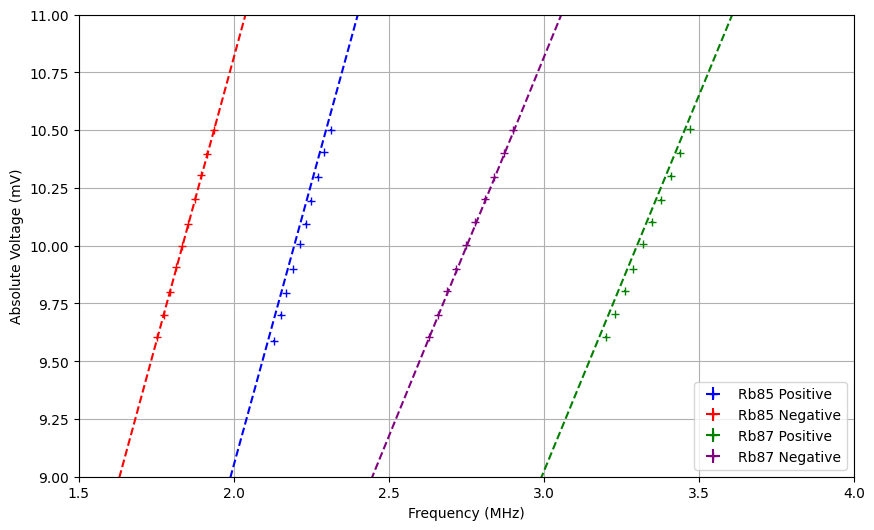

In [49]:
# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Freq (MHz)'], rb85_positive['Abs Voltage'], 
             xerr=rb85_positive['Freq Err'], yerr=rb85_positive['Voltage Error'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Freq (MHz)'], rb85_negative['Abs Voltage'], 
             xerr=rb85_negative['Freq Err'], yerr=rb85_negative['Voltage Error'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Freq (MHz)'], rb87_positive['Abs Voltage'], 
             xerr=rb87_positive['Freq Err'], yerr=rb87_positive['Voltage Error'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Freq (MHz)'], rb87_negative['Abs Voltage'], 
             xerr=rb87_negative['Freq Err'], yerr=rb87_negative['Voltage Error'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Frequency (MHz)')
plt.ylabel('Absolute Voltage (mV)')
plt.legend()
plt.grid(True)
plt.ylim(9,11)
plt.xlim(1.5,4)

# Show the plot
plt.show()

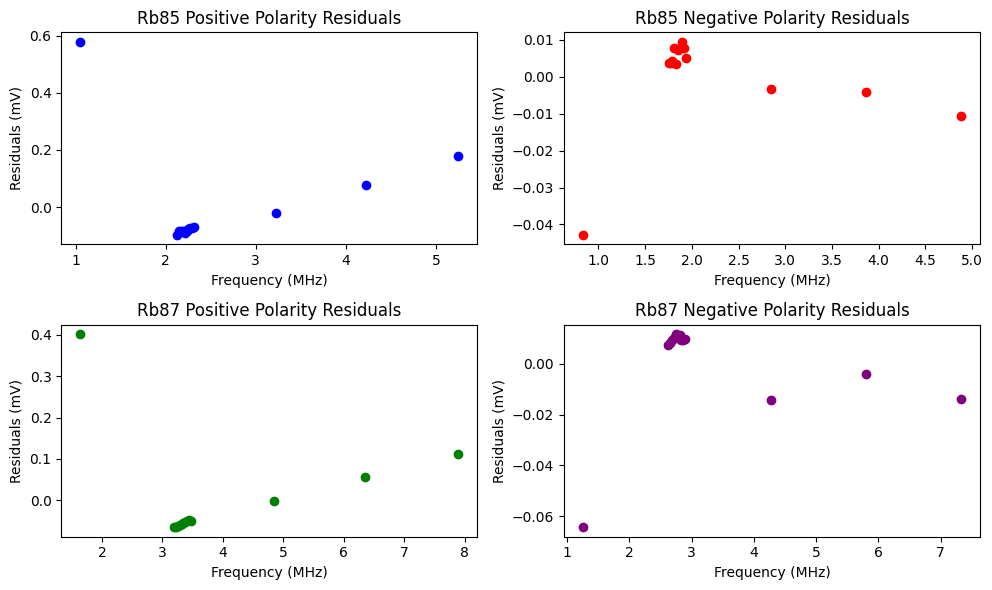

In [50]:
# Calculate residuals for each combination
rb85_positive_res = rb85_positive['Abs Voltage'] - linear_fit(rb85_positive['Freq (MHz)'], *rb85_positive_params)
rb85_negative_res = rb85_negative['Abs Voltage'] - linear_fit(rb85_negative['Freq (MHz)'], *rb85_negative_params)
rb87_positive_res = rb87_positive['Abs Voltage'] - linear_fit(rb87_positive['Freq (MHz)'], *rb87_positive_params)
rb87_negative_res = rb87_negative['Abs Voltage'] - linear_fit(rb87_negative['Freq (MHz)'], *rb87_negative_params)

# Plotting residuals
plt.figure(figsize=(10, 6))

# Residuals for Rubidium 85 - Positive Polarity
plt.subplot(2, 2, 1)
plt.plot(rb85_positive['Freq (MHz)'], rb85_positive_res, 'o', color='blue')
plt.title('Rb85 Positive Polarity Residuals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')

# Residuals for Rubidium 85 - Negative Polarity
plt.subplot(2, 2, 2)
plt.plot(rb85_negative['Freq (MHz)'], rb85_negative_res, 'o', color='red')
plt.title('Rb85 Negative Polarity Residuals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')

# Residuals for Rubidium 87 - Positive Polarity
plt.subplot(2, 2, 3)
plt.plot(rb87_positive['Freq (MHz)'], rb87_positive_res, 'o', color='green')
plt.title('Rb87 Positive Polarity Residuals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')

# Residuals for Rubidium 87 - Negative Polarity
plt.subplot(2, 2, 4)
plt.plot(rb87_negative['Freq (MHz)'], rb87_negative_res, 'o', color='purple')
plt.title('Rb87 Negative Polarity Residuals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

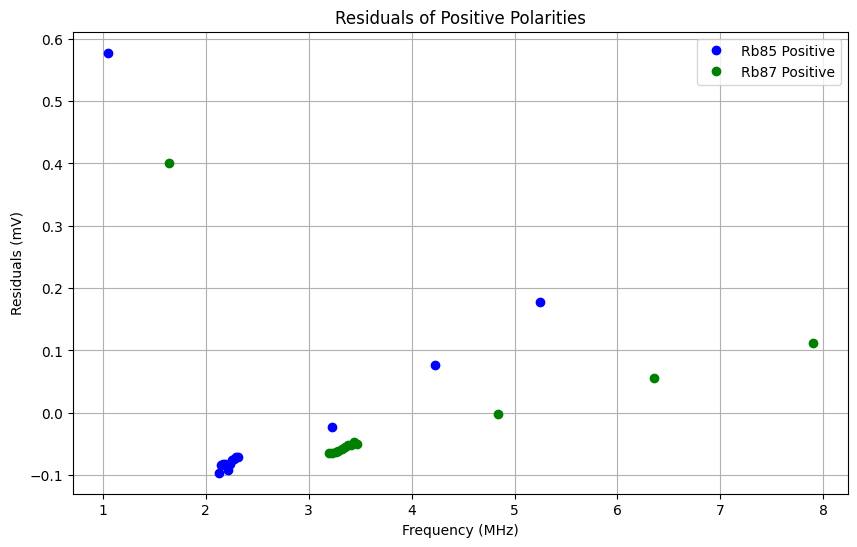

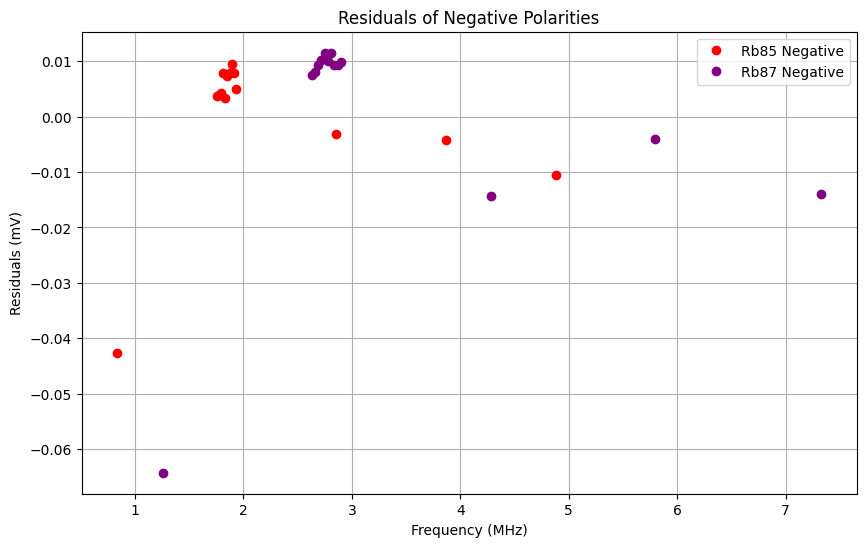

In [51]:
# Combine residuals
all_positive_res = np.concatenate((rb85_positive_res, rb87_positive_res))
all_negative_res = np.concatenate((rb85_negative_res, rb87_negative_res))

# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Positive Polarity
plt.plot(rb85_positive['Freq (MHz)'], rb85_positive_res, 'o', label='Rb85 Positive', color='blue')
plt.plot(rb87_positive['Freq (MHz)'], rb87_positive_res, 'o', label='Rb87 Positive', color='green')

# Add labels and legend
plt.title('Residuals of Positive Polarities')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Negative Polarity
plt.plot(rb85_negative['Freq (MHz)'], rb85_negative_res, 'o', label='Rb85 Negative', color='red')
plt.plot(rb87_negative['Freq (MHz)'], rb87_negative_res, 'o', label='Rb87 Negative', color='purple')

# Add labels and legend
plt.title('Residuals of Negative Polarities')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Old $Chi_{^85Rb, +}^2$ =438108.17277488136
Old $Chi_{^85Rb, -}^2$ =2379.5614184531787
Old $Chi_{^87Rb, +}^2$ =208871.4637793928
Old $Chi_{^87Rb, -}^2$ =5492.647896531442
r$Chi_{^85Rb, +}^2$ =438108.17277488107
$Chi_{^85Rb, -}^2$ =2379.5614184531064
$Chi_{^87Rb, +}^2$ =208871.46377939102
$Chi_{^87Rb, -}^2$ =5492.647896531481


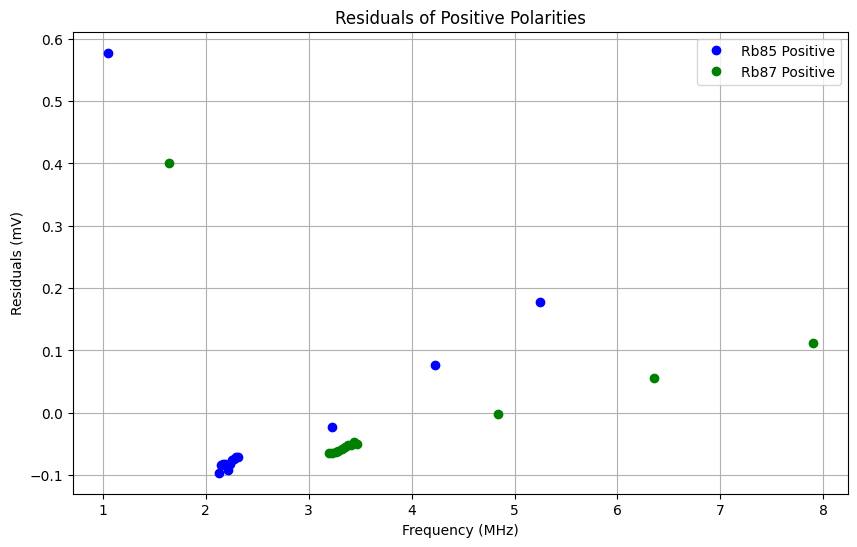

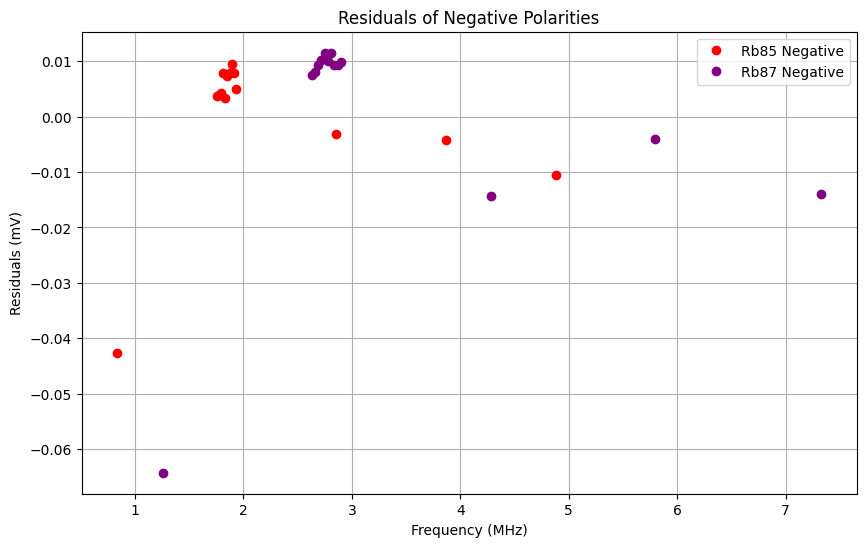

In [52]:
# Define weights for each data point based on errors
rb85_positive_weights = 1 / (rb85_positive['Voltage Error']**2)
rb85_negative_weights = 1 / (rb85_negative['Voltage Error']**2)
rb87_positive_weights = 1 / (rb87_positive['Voltage Error']**2)
rb87_negative_weights = 1 / (rb87_negative['Voltage Error']**2)

# Fit lines using weighted regression
rb85_positive_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   rb85_data[rb85_data['Polarity'] == 'P']['Abs Voltage'], 
                                   1, w=rb85_positive_weights)
rb85_negative_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   rb85_data[rb85_data['Polarity'] == 'N']['Abs Voltage'], 
                                   1, w=rb85_negative_weights)
rb87_positive_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   rb87_data[rb87_data['Polarity'] == 'P']['Abs Voltage'], 
                                   1, w=rb87_positive_weights)
rb87_negative_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   rb87_data[rb87_data['Polarity'] == 'N']['Abs Voltage'], 
                                   1, w=rb87_negative_weights)

print("Old "+ r"$Chi_{^85Rb, +}^2$ ="+str(chi_rb85_positive))
print("Old "+ r"$Chi_{^85Rb, -}^2$ ="+str(chi_rb85_negative))
print("Old " + r"$Chi_{^87Rb, +}^2$ ="+str(chi_rb87_positive))
print("Old " + r"$Chi_{^87Rb, -}^2$ ="+str(chi_rb87_negative))

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Abs Voltage'], linear_fit(rb85_positive['Freq (MHz)'], *rb85_positive_params), rb85_positive['Voltage Error'])
chi_rb85_negative = chi_squared(rb85_negative['Abs Voltage'], linear_fit(rb85_negative['Freq (MHz)'], *rb85_negative_params), rb85_negative['Voltage Error'])
chi_rb87_positive = chi_squared(rb87_positive['Abs Voltage'], linear_fit(rb87_positive['Freq (MHz)'], *rb87_positive_params), rb87_positive['Voltage Error'])
chi_rb87_negative = chi_squared(rb87_negative['Abs Voltage'], linear_fit(rb87_negative['Freq (MHz)'], *rb87_negative_params), rb87_negative['Voltage Error'])

print(r"r$Chi_{^85Rb, +}^2$ ="+str(chi_rb85_positive))
print(r"$Chi_{^85Rb, -}^2$ ="+str(chi_rb85_negative))
print(r"$Chi_{^87Rb, +}^2$ ="+str(chi_rb87_positive))
print(r"$Chi_{^87Rb, -}^2$ ="+str(chi_rb87_negative))

# Calculate residuals for each combination
rb85_positive_res = rb85_positive['Abs Voltage'] - linear_fit(rb85_positive['Freq (MHz)'], *rb85_positive_params)
rb85_negative_res = rb85_negative['Abs Voltage'] - linear_fit(rb85_negative['Freq (MHz)'], *rb85_negative_params)
rb87_positive_res = rb87_positive['Abs Voltage'] - linear_fit(rb87_positive['Freq (MHz)'], *rb87_positive_params)
rb87_negative_res = rb87_negative['Abs Voltage'] - linear_fit(rb87_negative['Freq (MHz)'], *rb87_negative_params)

# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Positive Polarity
plt.plot(rb85_positive['Freq (MHz)'], rb85_positive_res, 'o', label='Rb85 Positive', color='blue')
plt.plot(rb87_positive['Freq (MHz)'], rb87_positive_res, 'o', label='Rb87 Positive', color='green')

# Add labels and legend
plt.title('Residuals of Positive Polarities')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Negative Polarity
plt.plot(rb85_negative['Freq (MHz)'], rb85_negative_res, 'o', label='Rb85 Negative', color='red')
plt.plot(rb87_negative['Freq (MHz)'], rb87_negative_res, 'o', label='Rb87 Negative', color='purple')

# Add labels and legend
plt.title('Residuals of Negative Polarities')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Residuals (mV)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()